# Logistic Regression with Iris Species

### I will work on the iris dataset by creating a logistic regression machine learning model used for classification.
- https://www.kaggle.com/uciml/iris

### Logistic Regression is a supervised learning classification algorithm used to predict observations for a discrete set of classes. In short, it is used to categorize observations.

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# view dimensions of dataset

df.shape

(150, 6)

In [6]:
col_names = df.columns

col_names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['Species']


In [9]:
df[categorical].head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [11]:
df[categorical].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [12]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Species    0
dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


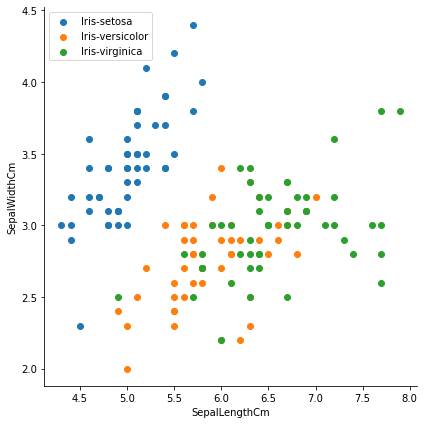

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
#Plot with respect to sepal length
sepalplt = sns.FacetGrid(df, hue="Species", size=6).map(plt.scatter, "SepalLengthCm", "SepalWidthCm")
plt.legend(loc='upper left');

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


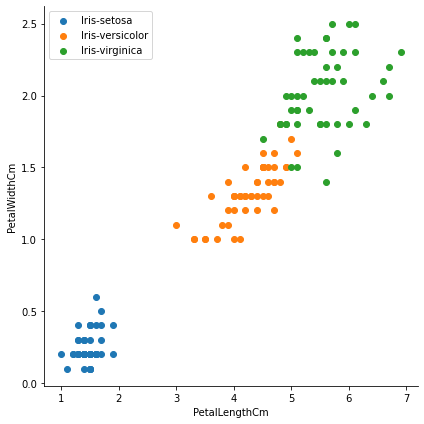

In [27]:
#plot with respect to petal length
petalplt = sns.FacetGrid(df, hue="Species", size=6).map(plt.scatter, "PetalLengthCm","PetalWidthCm")
plt.legend(loc='upper left')

## Logistic Regression 

In [19]:
from sklearn.model_selection import train_test_split
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Scaling the data

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Creating and training the logistic regression model

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='ovr', random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

### multi_class='ovr' makes the logistic regression model work in a multi-class scenario.

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = classifier.predict(x_test)
cm = confusion_matrix(predictions, y_test)
print(cm)
accuracy_score(predictions, y_test)

[[11  0  0]
 [ 0 11  1]
 [ 0  2  5]]


0.9

<AxesSubplot:>

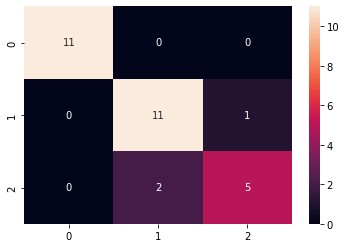

In [28]:
sns.heatmap(cm, annot=True)

<AxesSubplot:>

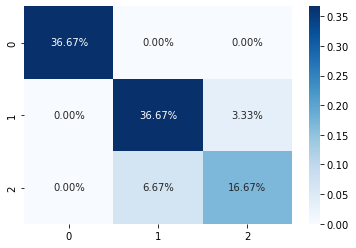

In [29]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%',cmap='Blues')